In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../datasets/train.csv')

In [3]:
train_data.shape

(878049, 9)

In [4]:
train_data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [5]:
train_data.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [6]:
categorys = train_data['Category'].unique()
categorys

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [7]:
# 犯罪类别个数
len(categorys)

39

In [8]:
Pd_districts = train_data['PdDistrict'].unique()
Pd_districts

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [9]:
len(Pd_districts)

10

In [10]:
test_data = pd.read_csv('../datasets/test.csv')

In [11]:
test_data.shape

(884262, 7)

In [12]:
test_data.head(5)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [13]:
test_data.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [20]:
def plot_bar_by_feature(feature, size_delta=(0,0)):
    features = train_data.columns.tolist()
    if feature not in features:
        return
    data = {feature:[], 'counts':[]}
    for a in train_data[feature].unique():
        data[feature].append(a)
        data['counts'].append(train_data[train_data[feature] == a].shape[0])
    DFData = pd.DataFrame(data)
    DFData = DFData.sort_values(by=['counts'], ascending=False)
    a = DFData.plot.bar(x=feature, y='counts')
    W,H = a.figure.get_size_inches()
    a.figure.set_size_inches(W+size_delta[0],H+size_delta[1])
    a.figure.savefig('../images/'+feature)

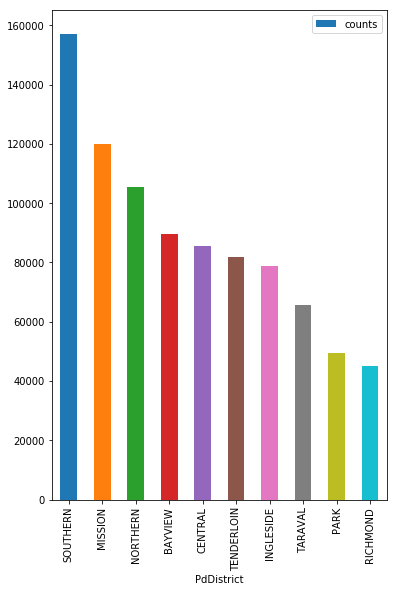

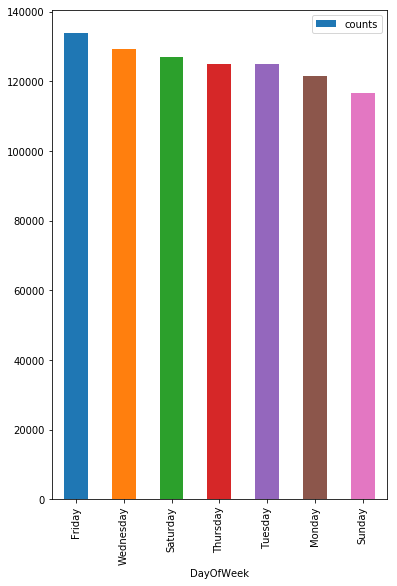

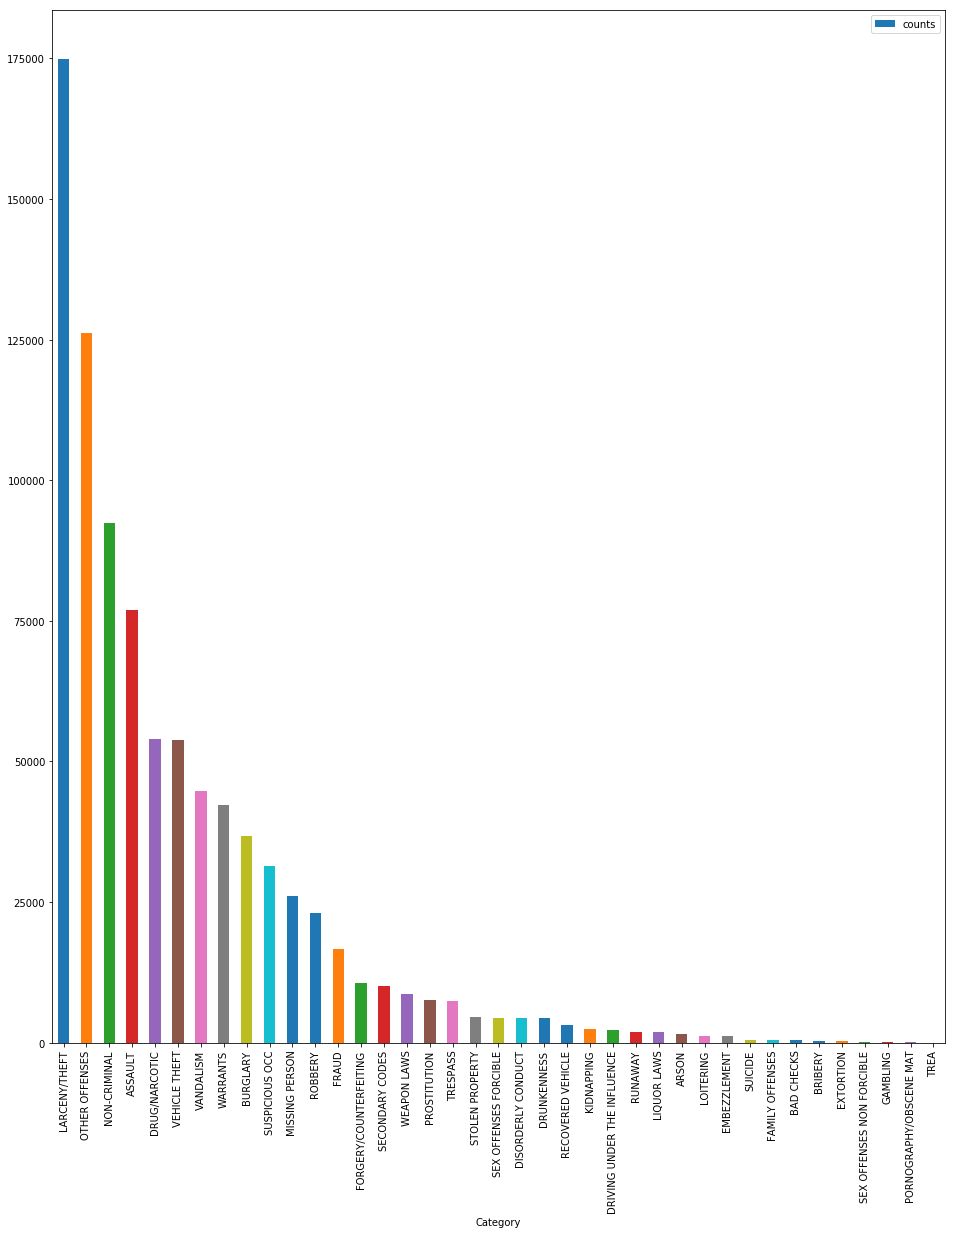

In [22]:
plot_bar_by_feature('PdDistrict', size_delta=(0,5))
plot_bar_by_feature('DayOfWeek', size_delta=(0,5))
plot_bar_by_feature('Category', size_delta=(10,15))

In [31]:
timestamps = train_data['Dates'].tolist()
datetimeindex = pd.DatetimeIndex(timestamps)
train_data_dates = train_data.set_index(datetimeindex)

In [40]:
print(train_data_dates.between_time('00:00', '01:00', include_end=False).shape[0])
print(train_data_dates.between_time('23:00', '00:00', include_end=False).shape[0])

44865
42460


In [43]:
hours_data = {'clock':[], 'counts':[]}
for t in range(24):
    hours_data['clock'].append(t)
    begin = '{}:00'.format(t)
    end = '{}:00'.format((t+1)%24)
    hours_data['counts'].append(train_data_dates.between_time(begin, end, include_end=False).shape[0])
    

hours_data = pd.DataFrame(hours_data)
hours_data = hours_data.sort_values(by='counts', ascending=False)

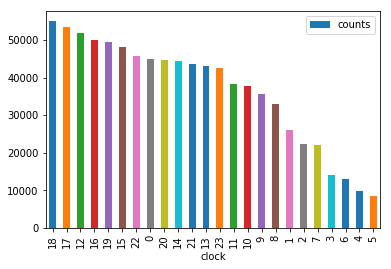

In [45]:
a = hours_data.plot.bar(x='clock', y='counts')
a.figure.savefig('../images/hours')

In [49]:
len(train_data['Address'])

878049

In [48]:
len(train_data['Address'].unique())

23228

In [53]:
train_data['Address'].unique()[0]

'OAK ST / LAGUNA ST'

In [60]:
# 按地址发生案件数量进行排序
address_data = {'address':[], 'counts':[]}
for addr in train_data['Address'].unique():
    address_data['address'].append(addr)
    address_data['counts'].append(train_data[train_data['Address'] == addr].shape[0])

In [61]:
address_data = pd.DataFrame(address_data)
address_data = address_data.sort_values(by='counts', ascending=False)

In [63]:
print(address_data[:20])

                           address  counts
124         800 Block of BRYANT ST   26533
407         800 Block of MARKET ST    6581
212       2000 Block of MISSION ST    5097
500       1000 Block of POTRERO AV    4063
871         900 Block of MARKET ST    3251
1090            0 Block of TURK ST    3228
82               0 Block of 6TH ST    2884
771          300 Block of ELLIS ST    2703
434          400 Block of ELLIS ST    2590
510           16TH ST / MISSION ST    2504
362        1000 Block of MARKET ST    2489
467        1100 Block of MARKET ST    2319
231        2000 Block of MARKET ST    2168
358       100 Block of OFARRELL ST    2140
35          700 Block of MARKET ST    2081
322          3200 Block of 20TH AV    2035
956            100 Block of 6TH ST    1887
92    500 Block of JOHNFKENNEDY DR    1824
2910           TURK ST / TAYLOR ST    1810
547           200 Block of TURK ST    1800
